In [1]:
import os
import qutip
import numpy as np
import matplotlib.pyplot as plt
from qurveros import plottools, misctools
from qurveros.qubit_bench import noise_experiments

import matplotlib
import qurveros.plot_configs
matplotlib.rcParams['figure.dpi'] = 150

In [2]:
gate_select = 'hadamard'

if gate_select == 'hadamard':
    u_target = 1/np.sqrt(2)*qutip.Qobj([[1,1],[1,-1]])
elif gate_select == 'xgate':
    u_target = qutip.sigmax()
else:
    u_target = None

control_points_paths = [os.path.join(os.getcwd(),'control_points', name) 
                        for name in os.listdir('control_points') 
                        if gate_select in name]

gate_dict = {}

for filepath in control_points_paths:
    gate_key = os.path.basename(filepath).rstrip('.csv')
    curve = misctools.prepare_bezier_from_file(filepath, is_barq=True)
    curve.evaluate_control_dict('TTC')
    gate_dict[gate_key] = curve  

In [3]:
gate_dict

{'hadamard_step50000': <qurveros.spacecurve.BezierCurve at 0x7f599c107bf0>,
 'hadamard_step0': <qurveros.spacecurve.BezierCurve at 0x7f594427f800>,
 'hadamard_step200': <qurveros.spacecurve.BezierCurve at 0x7f599c16a450>}

In [4]:
gate_names = sorted(gate_dict.keys())
gate_names

['hadamard_step0', 'hadamard_step200', 'hadamard_step50000']

In [5]:
plot_mosaic = [[gate_name + curve_type for curve_type in ['_fields','_noise']]
                for gate_name in gate_names]
plot_mosaic

[['hadamard_step0_fields', 'hadamard_step0_noise'],
 ['hadamard_step200_fields', 'hadamard_step200_noise'],
 ['hadamard_step50000_fields', 'hadamard_step50000_noise']]

In [6]:
width = plt.rcParams['figure.figsize'][0]
height = plt.rcParams['figure.figsize'][1]
label_str_fields = 'abc'
label_str_noise = 'def'

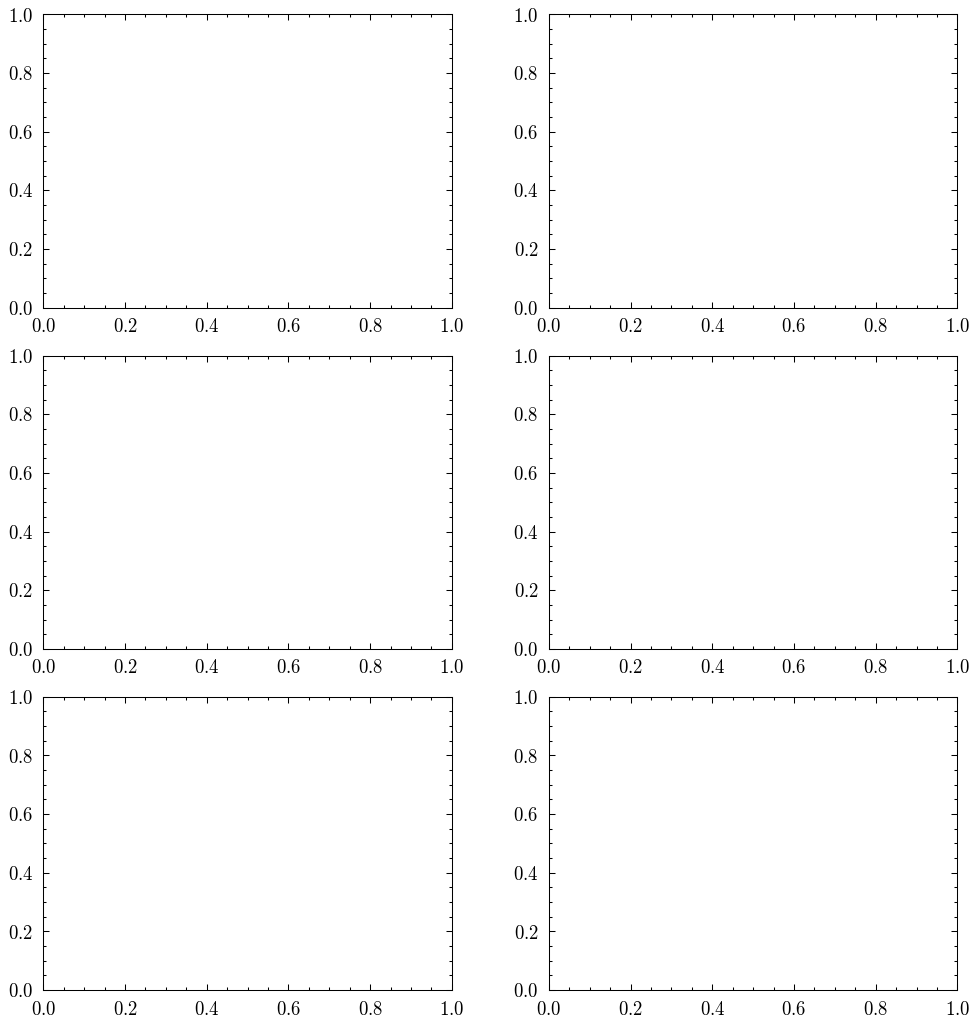

In [7]:
fig = plt.figure(figsize=(2*width, 2.8*height), 
                 layout='constrained')

axs = fig.subplot_mosaic(plot_mosaic, 
                        gridspec_kw = dict(wspace=0.1, hspace=0))

In [8]:
for idx, gate in enumerate(gate_names):

    plottools.plot_fields(gate_dict[gate].get_control_dict(), 
                          plot_mode='compact',
                          axs=axs[gate+'_fields'])
    
    axs[gate+'_fields'].text(0.92, 0.91, f'({label_str_fields[idx]})', 
                  transform=axs[gate+'_fields'].transAxes,
                  fontsize = matplotlib.rcParams['axes.labelsize'] )
    
    tg_delta = gate_dict[gate].get_control_dict()['delta'][0]
    tg_delta = np.round(tg_delta, 4)

    axs[gate+'_fields'].text(0.05, 0.05 , rf'$T_g\Delta={tg_delta}$', 
                  transform=axs[gate+'_fields'].transAxes,
                  fontsize = matplotlib.rcParams['axes.labelsize'] )
    
    axs[gate+'_fields'].locator_params(axis='y', nbins=10)

    #--------------------------------------------------------------

    sim_dict = noise_experiments.simult_source_experiment(
        gate_dict[gate].get_control_dict(), u_target)
    
    contour_set = plottools.plot_noise_contour(sim_dict, 
                                               ax=axs[gate+'_noise'])

    
    axs[gate+'_noise'].text(0.92, 0.91, f'({label_str_noise[idx]})', 
                        transform=axs[gate+'_noise'].transAxes,
                        fontsize = matplotlib.rcParams['axes.labelsize'],
                        color='w')
    
    for plot_info in ['_fields','_noise']:

        if idx > 0:
            if 'fields' in plot_info:
                axs[gate+plot_info].get_legend().set_visible(False)
        if idx < 2:
            axs[gate+plot_info].get_xaxis().get_label().set_visible(False)
            axs[gate+plot_info].get_xaxis().set_ticklabels([]) 

fig.align_ylabels()
cb = fig.colorbar(contour_set, location='top',
                  ax=axs[gate_names[0]+'_noise'],
                  pad=-0.11)
cb.set_label(r'Infidelity  $[\text{log}_{10}(\mathcal{I})]$',
                     labelpad=matplotlib.rcParams['xtick.major.pad'])

Static additive dephasing and multiplicative driving field experiment



Multiplicative driving field error:	 0.00 %
Multiplicative driving field error:	 8.33 %                                   
Multiplicative driving field error:	16.67 %                                   
Multiplicative driving field error:	25.00 %                                   
Multiplicative driving field error:	33.33 %                                   
Multiplicative driving field error:	41.67 %                                   
Multiplicative driving field error:	50.00 %                                   
Multiplicative driving field error:	58.33 %                                   
Multiplicative driving field error:	66.67 %                                   
Multiplicative driving field error:	75.00 %                                   
Multiplicative driving field error:	83.33 %                                   
Multiplicative driving field error:	91.67 %                                   
Multiplicative driving field error:	100.00%                                   

Multip

Static additive dephasing and multiplicative driving field experiment


Multiplicative driving field error:	 8.33 %                                   
Multiplicative driving field error:	16.67 %                                   
Multiplicative driving field error:	25.00 %                                   
Multiplicative driving field error:	33.33 %                                   
Multiplicative driving field error:	41.67 %                                   
Multiplicative driving field error:	50.00 %                                   
Multiplicative driving field error:	58.33 %                                   
Multiplicative driving field error:	66.67 %                                   
Multiplicative driving field error:	75.00 %                                   
Multiplicative driving field error:	83.33 %                                   
Multiplicative driving field error:	91.67 %                                   
Multiplicative driving field error:	100.00%                                   

Multiplicative driving field error:	 0.00 %
	 \----

Static additive dephasing and multiplicative driving field experiment


Multiplicative driving field error:	 8.33 %                                   
Multiplicative driving field error:	16.67 %                                   
Multiplicative driving field error:	25.00 %                                   
Multiplicative driving field error:	33.33 %                                   
Multiplicative driving field error:	41.67 %                                   
Multiplicative driving field error:	50.00 %                                   
Multiplicative driving field error:	58.33 %                                   
Multiplicative driving field error:	66.67 %                                   
Multiplicative driving field error:	75.00 %                                   
Multiplicative driving field error:	83.33 %                                   
Multiplicative driving field error:	91.67 %                                   
Multiplicative driving field error:	100.00%                                   


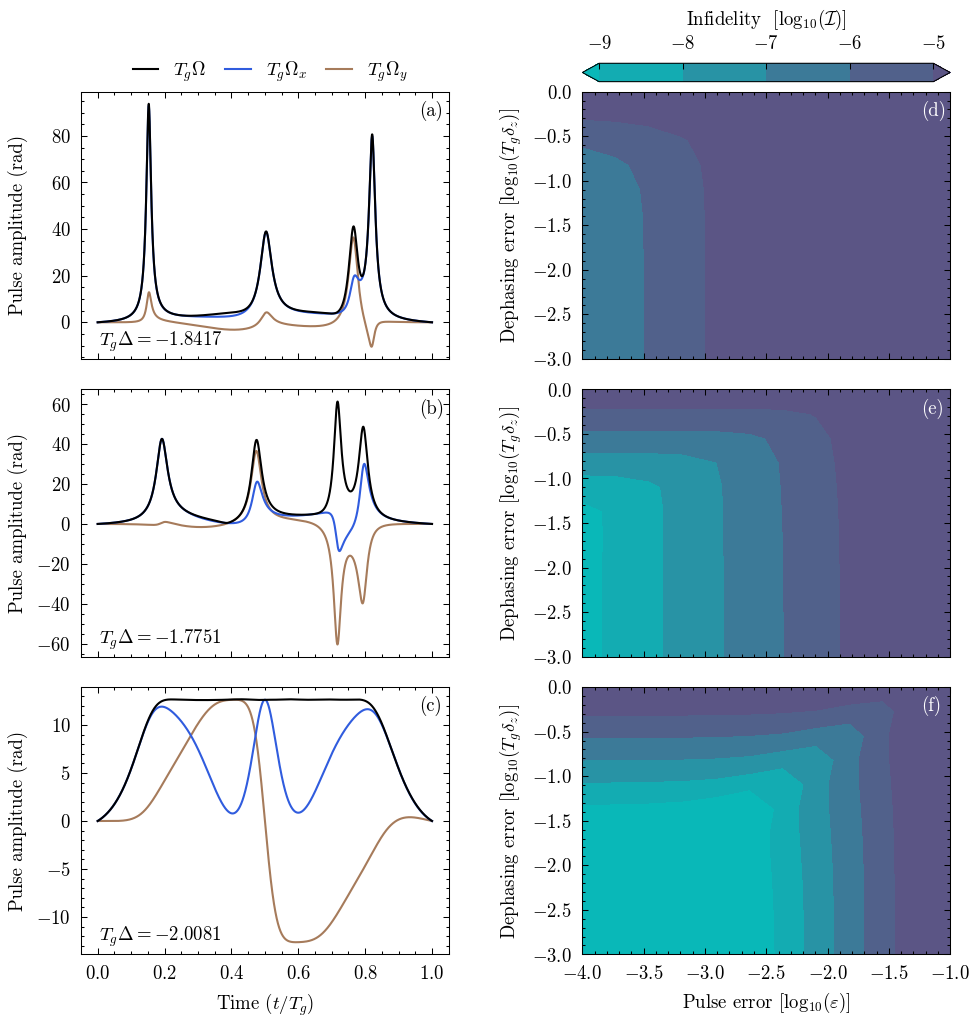

In [9]:
fig

In [10]:
fig.savefig('figs/'+gate_select+'_curve_evol_joined.pdf')
fig.savefig('figs/'+gate_select+'_curve_evol_joined.svg')